<b>Worksheet 8</b>

Filters Task 1 (emboss) :

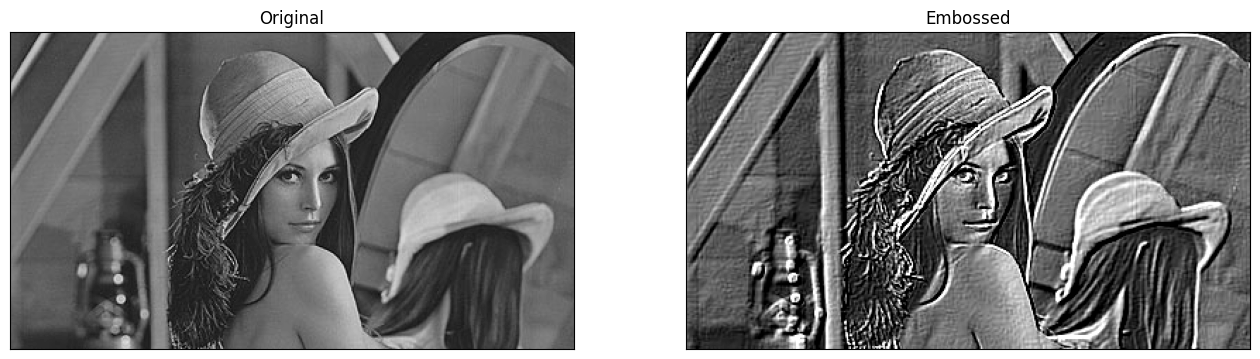

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray= cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
#kernel = np.ones((5,5),np.float32)/25
kernel = np.array([[-2,-1,0], [-1, 1, 1], [0, 1, 2]])
dst = cv2.filter2D(imgGray,-1,kernel)
plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(imgGray, vmin=0, vmax=255, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, vmin=0, vmax=255, cmap='gray')
plt.title('Embossed')
plt.xticks([]), plt.yticks([])
plt.show()

Filters Task 2 (smoothing):

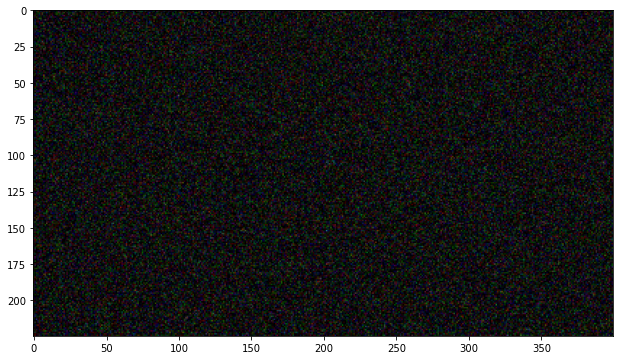

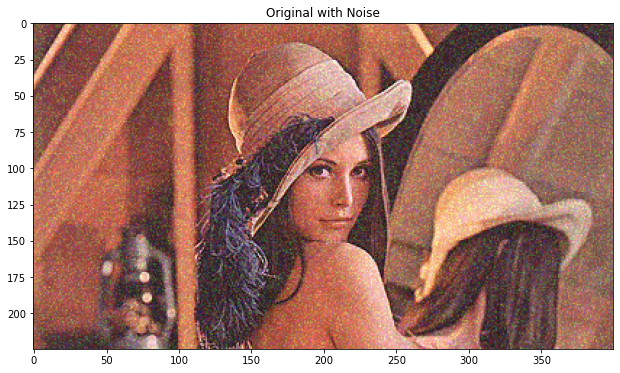

True


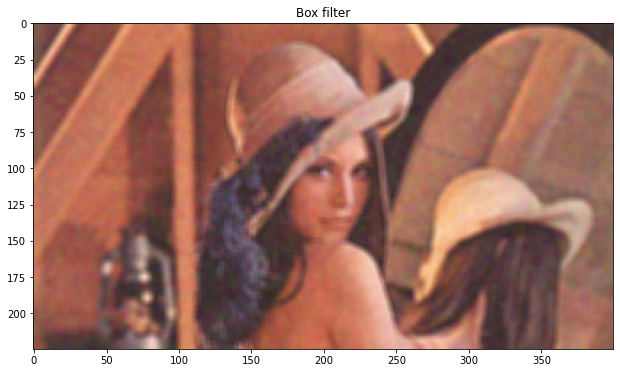

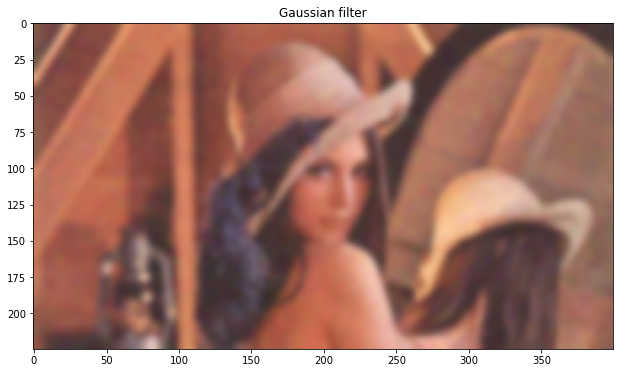

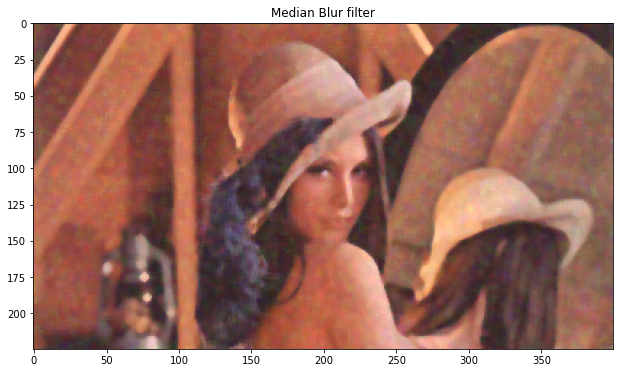

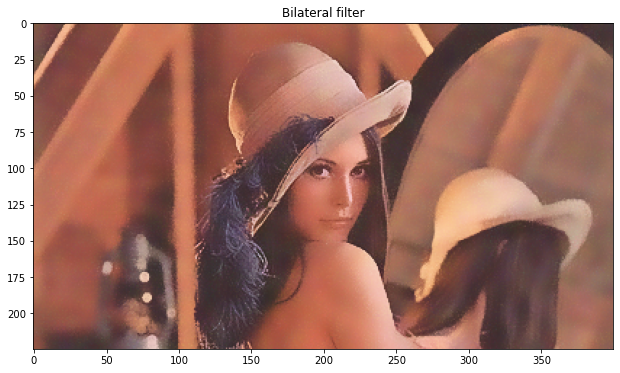

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Read image
img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Add noise
im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
mean = 10, 10, 10
sigma = 30, 30, 30
cv2.randn(im,mean,sigma) # create the random distribution
plt.figure(figsize= (12, 6))
plt.imshow(im)
plt.show()

im_noise = cv2.add(img, im) # add the noise to the original image

plt.figure(figsize= (12, 6))
plt.imshow(im_noise)
plt.title('Original with Noise')
plt.show()

# ---------------------------- Blur -Linear---------------------------- #
KernelSize = (5, 5)
BlurImg = cv2.blur(src=im_noise, ksize=KernelSize)
cv2.imshow('cvBlur', BlurImg)
KernelSize = (5, 5)
BoxFilterImg = cv2.boxFilter(src=im_noise, ddepth=-1, ksize=KernelSize, normalize=True)
plt.figure(figsize= (12, 6))
plt.imshow(BoxFilterImg, cmap='gray'), plt.title('Box filter')
print (np.equal(BlurImg, BoxFilterImg).all())
plt.show()

# ---------------------------- Gaussian Blur -Linear---------------------------- #
KernelSize = (15, 15)
GaussianBlurImg = cv2.GaussianBlur(src=im_noise, ksize=KernelSize, sigmaX=0, sigmaY=0)
plt.figure(figsize= (12, 6))
plt.imshow(GaussianBlurImg, cmap='gray'), plt.title('Gaussian filter')
plt.show()

# ---------------------------- Median Blur -Non-linear---------------------------- #
KernelSize = 5
MeanBlurImg = cv2.medianBlur(src=im_noise, ksize=KernelSize)
plt.figure(figsize= (12, 6))
plt.imshow(MeanBlurImg, cmap='gray'),plt.title('Median Blur filter')
plt.show()

# ---------------------------- Bilateral Blur -Non-linear -Task2 PartD ---------------------------- #
BilateralBlur = cv2.bilateralFilter(src=im_noise, d=12, sigmaColor=100, sigmaSpace=100)
plt.figure(figsize= (12, 6))
plt.imshow(BilateralBlur, cmap='gray'), plt.title('Bilateral filter')

plt.show()

Task 2: Salt & Pepper

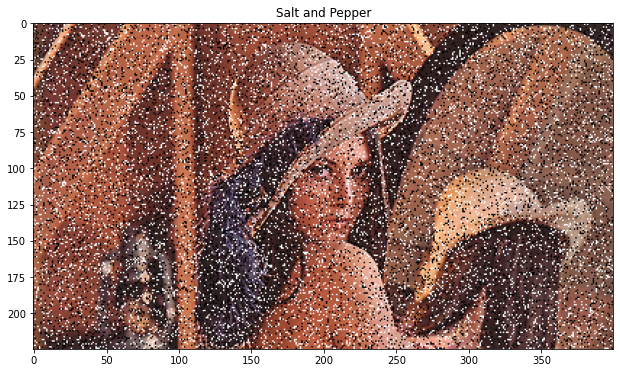

True


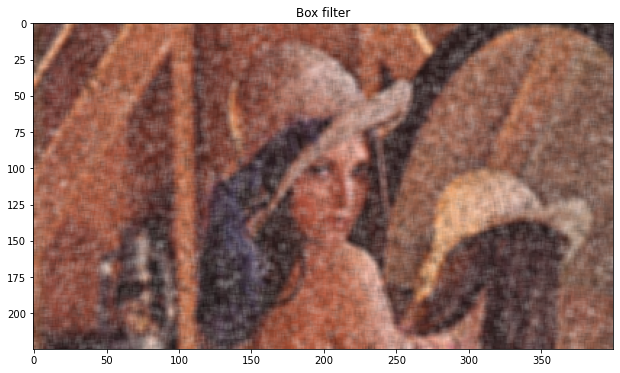

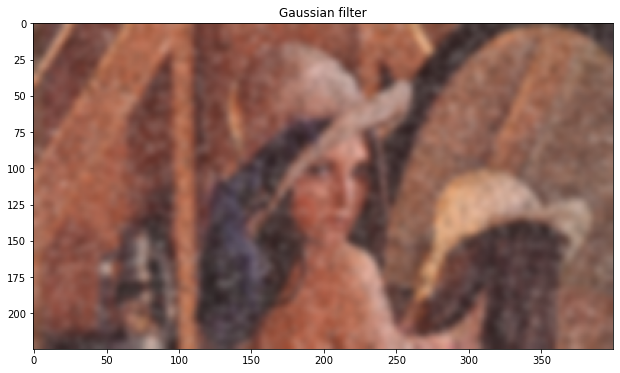

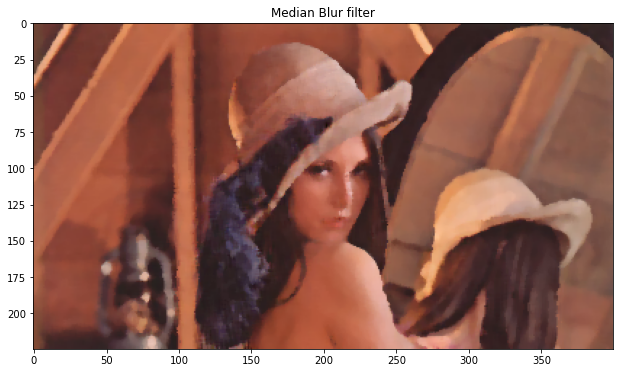

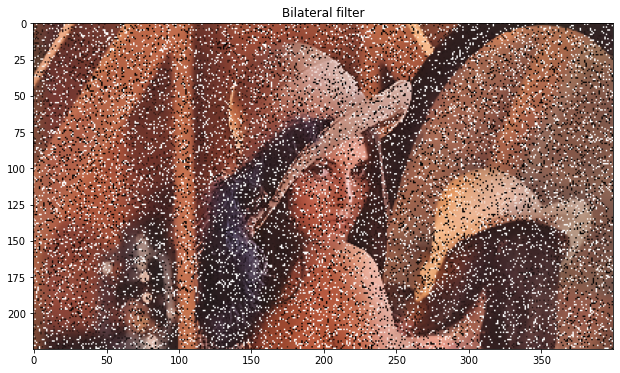

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Read image
img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def addsalt_pepper(img, SNR):
    img_ = img.transpose(2, 1, 0)
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255 # salt noise
    img_[mask == 2] = 0 #
    output = img_.transpose(2, 1, 0)
    return output

#Add noise
im_noise = addsalt_pepper(img, 0.8)
plt.figure(figsize= (12, 6))
plt.imshow(im_noise, cmap='gray'), plt.title('Salt and Pepper')
plt.show()

# ---------------------------- Blur ---------------------------- #
KernelSize = (5, 5)
BlurImg = cv2.blur(src=im_noise, ksize=KernelSize)
cv2.imshow('cvBlur', BlurImg)
KernelSize = (5, 5)
BoxFilterImg = cv2.boxFilter(src=im_noise, ddepth=-1, ksize=KernelSize, normalize=True)
plt.figure(figsize= (12, 6))
plt.imshow(BoxFilterImg, cmap='gray'), plt.title('Box filter')
print (np.equal(BlurImg, BoxFilterImg).all())
plt.show()

# ---------------------------- Gaussian Blur ---------------------------- #
KernelSize = (15, 15)
GaussianBlurImg = cv2.GaussianBlur(src=im_noise, ksize=KernelSize, sigmaX=0, sigmaY=0)
plt.figure(figsize= (12, 6))
plt.imshow(GaussianBlurImg, cmap='gray'), plt.title('Gaussian filter')
plt.show()

# ---------------------------- Median Blur ---------------------------- #
KernelSize = 5
MeanBlurImg = cv2.medianBlur(src=im_noise, ksize=KernelSize)
plt.figure(figsize= (12, 6))
plt.imshow(MeanBlurImg, cmap='gray'),plt.title('Median Blur filter')
plt.show()

# ---------------------------- Bilateral Blur -Task2 PartD ---------------------------- #
BilateralBlur = cv2.bilateralFilter(src=im_noise, d=12, sigmaColor=100, sigmaSpace=100)
plt.figure(figsize= (12, 6))
plt.imshow(BilateralBlur, cmap='gray'), plt.title('Bilateral filter')

plt.show()

Task 3 Custom Gaussian kernel

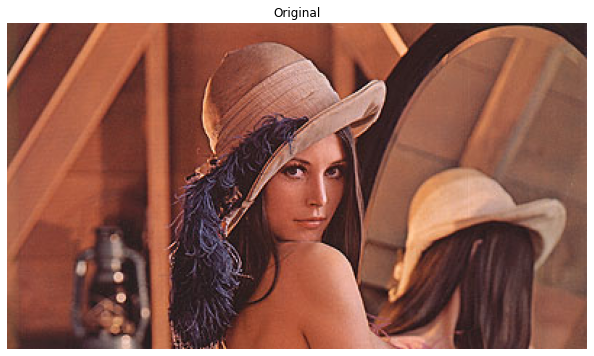

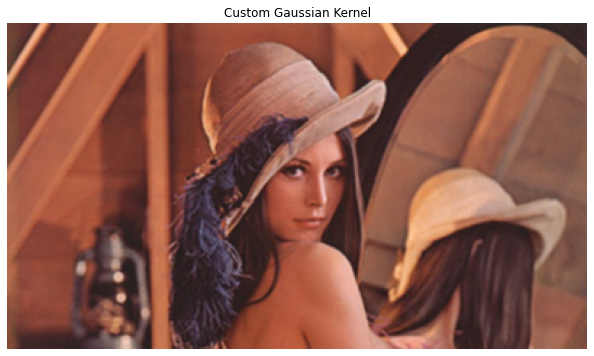

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.array([[1 , 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize= (12, 6))
plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.figure(figsize= (12, 6))
plt.imshow(dst), plt.title('Custom Gaussian Kernel')
plt.axis('off')
plt.show()


Task 3 (extra example: Generate Gaussian kernel

GaussianKernelX:
 [[0.03125 ]
 [0.109375]
 [0.21875 ]
 [0.28125 ]
 [0.21875 ]
 [0.109375]
 [0.03125 ]]
GaussianKernelY:
 [[0.03125 ]
 [0.109375]
 [0.21875 ]
 [0.28125 ]
 [0.21875 ]
 [0.109375]
 [0.03125 ]]


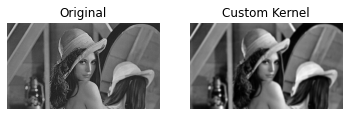

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg', 0)
KernelSize = (7, 7)
GaussianKernelX = cv2.getGaussianKernel(ksize=KernelSize[0], sigma=0)
GaussianKernelY = cv2.getGaussianKernel(ksize=KernelSize[1], sigma=0)
print ('GaussianKernelX:\n', GaussianKernelX)
print ('GaussianKernelY:\n', GaussianKernelY)


FilterGaussian = cv2.sepFilter2D(src=img, ddepth=-1, kernelX=GaussianKernelX, kernelY=GaussianKernelY)

plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(FilterGaussian, cmap='gray'), plt.title('Custom Kernel')
plt.axis('off')
plt.show()